# Intellligent Data Analysis

- **Data Set:** #31
- **Author 1:** Vladimír Svitok
- **Author 2:** Juraj Baráth

## Prieskumná analýza (max. 12b)
Prieskumná analýza je kľúčovou časťou analýzy dát. Bez nej nie sme schopní dáta spracúvať, pretože nevieme, čo sa v nich nachádza. Využíva sa  pritom predovšetkým deskriptívna štatistika a rôzne podporné vizualizácie. 

V tejto fáze sa od vás očakáva:

- **Základný opis dát spolu s ich charakteristikami (3b).** Pre dosiahnutie plného počtu bodov uveďte počet záznamov, počet atribútov, ich typy a pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
- **Párová analýza dát (4b).** Preskúmajte vzťahy medzi zvolenými dvojicami atribútov. Zamerajte sa pritom na identifikáciu závislostí medzi dvojicami atribútov (napr. korelácie) a na závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).
- **Formulácia a štatistické overenie hypotéz o dátach (2b).** Mali by ste sformulovať aspoň dve hypotézy o dátach, ktoré budú relevantné v kontexte zadanej predikčnej úlohy. Príkladom hypotézy (v závislosti od pridelenej dátovej sady) môže byť, že *pacienti s chorobou štítnej žľazy majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti bez danej choroby*. Vami sformulované hypotézy overte vhodne zvoleným štatistickým testom.
- **Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze (3b).** Mali by ste identifikovať, čo budete musieť v rámci predspracovania vyriešiť (aj s naznačením možností, ako tieto problémy plánujete v ďalšej fáze riešiť). Medzi problémy, na ktoré môžete v rámci analýzy naraziť, patria napr.: 
   - nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
   - duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
   - nejednotné formáty dát
   - chýbajúce hodnoty
   - vychýlené (odľahlé) hodnoty
   - a ďalšie, t. j. v dátach sa môžu nachádzať aj iné, tu nevymenované problémy, ktoré tiež treba identifikovať a vo vašej analýze adresovať.

V odovzdanej správe (`Jupyter Notebooku`) by ste tak mali vedieť zodpovedať na otázky:
- Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
- Sú niektoré atribúty medzi sebou závislé? Od ktorých (jednotlivých) atribútov závisí predikovaná premenná?
- Sú v dátach chýbajúce hodnoty? Ako sú reprezentované? Ako plánujete riešiť problém chýbajúcich hodnôt pre jednotlivé atribúty, resp. pozorovania? (Pre rôzne atribúty môže byť vhodné použiť rôzne stratégie.)
- Nadobúdajú niektoré atribúty nezmyselné (nekonzistentné) či inak výrazne odchýlené hodnoty? Ktoré?
- Ako plánujete v ďalšej fáze tieto identifikované problémy adresovať / riešiť?

Správa sa odovzdáva v 6. týždni semestra na cvičení (dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v `Jupyter Notebooku`). Následne správu elektronicky odovzdá jeden člen z  dvojice do systému AIS do **nedele 3.11.2019 do 23:59**.



## Dataset: personal_train

- **Počet záznamov:** 3933
- **Počet atribútov:** 6

### Zoznam atribútov, problémi a riešenia


| Atribút           | Typ             | Popis                    | Problémi a ich riešenia        |
|:------------------|:----------------|:-------------------------|:-------------------------------|
| **Unnamed: 0**    | int             | Identifikačné číslo pacienta | Stĺpec nemá správny názov, máme to premenovať na **id** |
| **name**          | string          | Meno pacienta            | Žiadne |
| **address**       | multi-line string | Domovská adresa pacienta | Žiadne                         | Netreba nič riešiť
| **age**           | int             | Vek pacienta             | Niektoré záznamy neobsahujú vek pacienta. | 
|                   |                 | | Namiesto veku sa v záznamoch nachádzajú "?" alebo "NaN"   |
|                   |                 | | Tieto chýbajúce hodnoty budeme počítať z dátumu narodania |
| **sex**           | enum            | Pohlavie pacienta | Hodnoty začínajú zbytočným medzerom, ktoré musíme odstrániť, môže mať hodnoty "Male" a "Female"  |
| **date_of_birth** | date            | Dátum narodenia | Obsahuje rôzne formáty. Zjednotíme do tvaru: yyyy-mm-dd   |




## Dataset: other_train

- **Počet záznamov:** 3983
- **Počet atribútov:** 23

|  Attribút            | Typ    |  Popis  | Problémi a ich riešenia, použitie údajov
|:---------------------|:--------|:-----|:----|
| **Unnamed: 0**       | int  | Identifikačné číslo pacienta | Stĺpec nemá správny názov, máme to premenovať na **id** |
| **name**             | string  | Meno pacienta |Podľa mena budeme spájať tabuľky **presonal_train** a **other_train** pretože atribúť **age** považujeme relevantný k výsledkom, ktoré sa snažíme zistiť |
| **address**          | multi-line string | Domovská adresa pacienta | Budeme používať v prípade duplicitných mien, Pokiaľ budú adresy rovnaké vieme, že sa jedná o toho istého pacienta, pokiaľ rozdielne tak sú to záznamy rôznych pacientov|
| **race**             | enum  | Pôvodnosť pacienta  | Môže byť užitočné, ako kritéria na vygenerovanie štatistík údajov, má zbytočné medzeri
| **marital-status**   | enum  | Rodinný stav pacienta | Predpokladáme že nie je významný pre našu predikovanú premennú|
| **occupation**       | enum  | Povolenie pacienta | Predpokladáme že nie je významný pre našu predikovanú premennú|
| **pregnant**         | bool  | Tehotnosť pacienta | Obsahuje rôzne formáty dát. Pretypujeme na bool hodnotu|
| **education-num**    | int   | Stupeň štúdia (číselne vyjadrené) | Predpokladáme že nie je významný pre našu predikovanú premennú |
| **relationship**     | enum  | Ľudské vzťahy pacienta | Predpokladáme že nie je významný pre našu predikovanú premennú |
| **skewness_glucose** | float | Šikmosť glukóza | Z grafu vidíme, že hodnoty sú v priemere výrazne vyššie u ľudí, ktorým bola diagnostikovaná choroba |
|**mean_glucose**     | float | Stredná glukóza | Z grafu vidíme, že hodnoty sú v priemere nižšie u ľudí, ktorým bola diagnostikovaná choroba|
|**capital-gain**     | float | Kapitáloví zisk | Predpokladáme že nie je významný pre našu predikovanú premennú|
|**kurtosis_glucose** | float | Kurtózia glukóza | Z grafu vidíme, že hodnoty sú v priemere výrazne vyššie u ľudí, ktorým bola diagnostikovaná choroba|
|**education**        | string | Stupeň štúdia (slovne opísané) | Predpokladáme že nie je významný pre našu predikovanú premennú |
|**fnlwgt**           | float | Nevieme presne čo to znamená | Predpokladáme že nie je významný pre našu predikovanú premennú |
|**class**            | bool | Klasifikácia pacienta, či má cukrovku, alebo nemá | Nemá žiadne problémi, je to kritický údaj pri analýzi ostatných údajov, používame to ako hlavný filter pri vygenerovaní grafov |
|**std_glucose**      | float | Štandard glukóza | V tomto stĺpci sa nachádzajú odchýlené hodnoty, ktoré vidno v tabuľke o dátach aj v grafoch. Minimálna hodnota okolo -6000 a maximálna okolo 7500 značí že bude treba tieto údaje prehodnotiť a vypočítať nové, ktoré budú presné.|
|**income**           | float    | Príjem | Predpokladáme že nie je významný pre našu predikovanú premennú|
|**medical_info**     | 4 floats | Hodnoty meraní kyslíka | Hodnoty meraní kyslíka sú zapísané vo formáte JSON. Ten spracujeme a rozdelíme do 4 rôznych stĺpcov: mean_oxygen, std_oxygen, kurtosis_oxygen, skewness_oxygen |
|**mean_oxygen**      | float | Stredný kyslík | Z grafu vidíme, že pacienti s chorobou majú priemerne trochu vyššie hodnoty ako zdravý pacienti, no nedá sa priamo určiť stav pacienta|
|**std_oxygen**       | float | Štandard kyslíka | Z grafu vidíme, že pacienti s chorobou majú priemerne vyššie hodnoty ako zdravý pacienti, no nedá sa priamo určiť stav pacienta|
|**kurtosis_oxygen**  | float | Kurtózia kyslíka | Z grafu vidíme, že pacienti s chorobou majú priemerne nižšie hodnoty ako zdravý pacienti no nedá sa priamo určiť stav pacienta|
|**skewness_oxygen**  | float | Šikmosť kyslíka | Z grafu vidíme, že pacienti s chorobou majú priemerne nižšie hodnoty ako zdravý pacienti, no nedá sa priamo určiť stav pacienta|
|**native-country**   | string | Rodná krajina | Predpokladáme že nie je významný pre našu predikovanú premennú |
|**hours-per-week**   | float  | Týždenne zapracované hodiny | Predpokladáme že nie je významný pre našu predikovanú premennú|
|**capital-loss**     | float  | Kapitálová strata | Predpokladáme že nie je významný pre našu predikovanú premennú|

### Medzi významné atribúty sme zaradili
- age
- class
- kurtosis_glucose
- mean_glucose
- medical_info
- name
- pregnant
- race
- sex
- skewness_glucose
- std_glucose

Predpokladáme že tieto atribúty môžu mať vplyv na našu predikovanú premennú

Vidíme že:  **skewness_oxygen** a **skewness_glucose** spolu nepriamo súvisia, 
            **mean_glucose** a **mean_oxygen** spolu nepriamo súvisia, 
            **kurtosis_glucose** a **kurtosis_oxygen** spolu nepriamo súvisia, 
Na základe týchto zistení by sme mali byť schopný určiť stav pacienta.

V štatistickej tabuľke vidno že merania hodnôt cukru spolu priamo úmerne súvisia.

## Korelácie

### Pozitívne (>0.5)

- **skewness_glucose:** kurtosis_glucose (0.962056), class (0.680059), mean_oxygen (0.550525), std_oxygen (0.55682)
- **kurtosis_glucose:** class (0.787698), mean_oxygen (0.594049), std_oxygen (0.61698)
- **class:** mean_oxygen (0.514376), std_oxygen (0.641619)
- **mean_oxygen:** std_oxygen (0.801483)
- **kurtosis_oxygen:** skewness_oxygen (0.916746)

### Negatívne (<-0.5)

- **skewness_glucose:** mean_glucose (-0.826373)
- **mean_glucose:** kurtosis_glucose (-0.925739), class (-0.77454), mean_oxygen (-0.54111), std_oxygen (-0.556414)
- **kurtosis_glucose:** kurtosis_oxygen (-0.525496)
- **class:** kurtosis_oxygen (-0.556507)
- **mean_oxygen:** kurtosis_oxygen (-0.653326)
- **std_oxygen:** kurtosis_oxygen (-0.825101), skewness_oxygen (-0.596467)


## Hypotézy

- **1.** Ľudia s vyššími hodnotami výsledkov merania cukru sú nachylnejší na pozitívnemu výsledky na chorobu 
- **2.** Ľudia s nižšími hodnotami výsledkov merania kyslíka sú náchylnejší k pozitívnemu výsledku na chorobu


In [1]:
# Automatically reformat python code
# Check https://medium.com/openplanetary/code-formatting-in-jupyter-cells-8fee4eda072f for more info
# %load_ext lab_black

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import json
import seaborn as sea

In [3]:
data = pd.read_csv("personal_train.csv")

In [4]:
data2 = pd.read_csv("other_train.csv")

In [5]:
# Check how does the personal train data (data) look like
data.head(30)

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",60,Male,1959-09-26
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52,Male,1966-10-28
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60,Male,1959-06-16
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",39,Male,1980-09-09
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",49,Male,1970-02-22
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",46,Male,1973-09-25
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,54,Female,1964-10-31
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,67,Male,1952-07-23
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",52,Male,1967-06-28
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",30,Male,1988-11-07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
Unnamed: 0       3933 non-null int64
name             3933 non-null object
address          3933 non-null object
age              3658 non-null object
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: int64(1), object(5)
memory usage: 184.4+ KB


In [7]:
# Rename the 'Unnamed: 0' column to 'id'
data.rename(columns={data.columns[0]: "id"}, inplace=True)
data2.rename(columns={data2.columns[0]: "id"}, inplace=True)

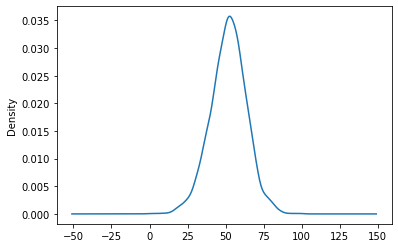

In [8]:
# Plot the age column
data["age"] = pd.to_numeric(data["age"], errors="coerce")
data["age"].plot.kde()

In [9]:
data.describe()

,id,age
count,3933.000000,3540.000000
mean,1966.000000,51.848870
std,1135.503633,11.787179
min,0.000000,-1.000000
25%,983.000000,45.000000
50%,1966.000000,52.000000
75%,2949.000000,60.000000
max,3932.000000,99.000000


In [10]:
data.corr()

,id,age
id,1.000000,0.008267
age,0.008267,1.000000


In [11]:
# Check how does the other train data (data2) look like
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 23 columns):
id                  3983 non-null int64
name                3983 non-null object
address             3983 non-null object
race                3963 non-null object
marital-status      3972 non-null object
occupation          3973 non-null object
pregnant            3969 non-null object
education-num       3969 non-null float64
relationship        3969 non-null object
skewness_glucose    3970 non-null float64
mean_glucose        3970 non-null float64
capital-gain        3974 non-null float64
kurtosis_glucose    3972 non-null float64
education           3963 non-null object
fnlwgt              3975 non-null float64
class               3970 non-null float64
std_glucose         3576 non-null float64
income              3968 non-null object
medical_info        3965 non-null object
native-country      3969 non-null object
hours-per-week      3968 non-null float64
capital-loss        3972

In [12]:
# Check how does the other train data (data2) look like
data2.head(30)

,id,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Mike Riley,023 Joseph Estate Suite 799\r\nLake Andrewvill...,White,Married-civ-spouse,Prof-specialty,f,12.0,Husband,1.605420,...,Assoc-acdm,251396.0,0.0,37.450318,>50K,"{'mean_oxygen':'10.03511706','std_oxygen':'35....",Canada,45.0,0.0,Local-gov
1,1,Earl Hoffmann,"700 Darlene Mill\r\nJackburgh, GA 99369",White,Divorced,Craft-repair,f,9.0,Unmarried,10.994893,...,HS-grad,157446.0,1.0,33.842927,<=50K,"{'mean_oxygen':'7.834448161','std_oxygen':'33....",United-States,45.0,0.0,Private
2,2,Lorenzo Mann,"56863 Stephen Island\r\nSouth Danielle, NV 40760",White,Divorced,Craft-repair,t,10.0,Not-in-family,-0.290893,...,Some-college,106014.0,0.0,51.123164,<=50K,"{'mean_oxygen':'3.505852843','std_oxygen':'19....",United-States,60.0,0.0,Private
3,3,Justin Trevino,"18446 Pace Junction\r\nNew Christyfurt, SD 32280",White,Never-married,Tech-support,f,13.0,Not-in-family,13.476089,...,Bachelors,189590.0,1.0,45.923142,<=50K,"{'mean_oxygen':'83.55351171','std_oxygen':'66....",United-States,40.0,0.0,Private
4,4,Thomas Davis,"67753 Wilson Ford\r\nNew Rachelport, NV 50148",White,Married-civ-spouse,Transport-moving,f,9.0,Husband,0.680234,...,HS-grad,134768.0,0.0,46.867134,>50K,"{'mean_oxygen':'2.602842809','std_oxygen':'18....",United-States,40.0,0.0,Private
5,5,Lynn Quist,"2232 Flores Ridge\r\nSanchezstad, IL 31455",White,Divorced,Transport-moving,f,9.0,Not-in-family,1.315007,...,HS-grad,143542.0,0.0,40.466252,<=50K,"{'mean_oxygen':'4.886287625','std_oxygen':'24....",United-States,40.0,0.0,Private
6,6,Roscoe Shelton,"6954 Carrillo Shoals Apt. 139\r\nSandersview, ...",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,2.731511,...,Bachelors,259840.0,0.0,35.750382,<=50K,"{'mean_oxygen':'1.705685619','std_oxygen':'17....",United-States,45.0,0.0,Private
7,7,Jose Aigner,"76756 Ashley Mount\r\nGomezchester, NV 49283",White,Divorced,Sales,f,13.0,Not-in-family,2.022478,...,Bachelors,364548.0,0.0,39.279398,>50K,"{'mean_oxygen':'2.117056856','std_oxygen':'15....",United-States,40.0,0.0,Private
8,8,Robert Gerke,"820 Mark Drives\r\nMichaelchester, OH 64396",White,Married-civ-spouse,Sales,F,10.0,Husband,0.169639,...,Some-college,114520.0,0.0,49.502052,<=50K,"{'mean_oxygen':'5.197324415','std_oxygen':'26....",United-States,40.0,0.0,Self-emp-not-inc
9,9,Andre Bennett,"25878 Hector Canyon\r\nJerryfurt, AZ 38098",White,Never-married,Prof-specialty,f,11.0,Not-in-family,0.743007,...,Assoc-voc,436770.0,0.0,40.479149,<=50K,"{'mean_oxygen':'0.766722408','std_oxygen':'9.5...",United-States,40.0,0.0,Private


In [13]:
# Check the column names of data and data 2
print(list(data.columns))
print(list(data2.columns))

['id', 'name', 'address', 'age', 'sex', 'date_of_birth']
['id', 'name', 'address', 'race', 'marital-status', 'occupation', 'pregnant', 'education-num', 'relationship', 'skewness_glucose', 'mean_glucose', 'capital-gain', 'kurtosis_glucose', 'education', 'fnlwgt', 'class', 'std_glucose', 'income', 'medical_info', 'native-country', 'hours-per-week', 'capital-loss', 'workclass']


In [14]:
# Count the number of entries in data
len(data)
len(data2)

3983

In [15]:
# Check the possible values of columns having less than 50 possible values
def print_col_values(d):
    for c in d.columns:
        l = list(d.drop_duplicates(c)[c])
        if len(l) < 50:
            print("••► " + c + " (" + str(len(l)) + "): " + str(l), end="\n\n")


print("===== Data =====")
print_col_values(data)
print("==== Data 2 =====")
print_col_values(data2)

===== Data =====
••► sex (2): [' Male', ' Female']

==== Data 2 =====
••► race (6): [' White', ' Amer-Indian-Eskimo', ' Black', nan, ' Asian-Pac-Islander', ' Other']

••► marital-status (8): [' Married-civ-spouse', ' Divorced', ' Never-married', ' Widowed', ' Married-spouse-absent', ' Separated', nan, ' Married-AF-spouse']

••► occupation (16): [' Prof-specialty', ' Craft-repair', ' Tech-support', ' Transport-moving', ' Adm-clerical', ' Sales', ' Other-service', ' Exec-managerial', ' Machine-op-inspct', ' Protective-serv', ' Farming-fishing', ' Handlers-cleaners', ' ?', ' Priv-house-serv', nan, ' Armed-Forces']

••► pregnant (7): ['f', 't', 'F', 'FALSE', 'T', nan, 'TRUE']

••► education-num (17): [12.0, 9.0, 10.0, 13.0, 11.0, 6.0, 16.0, 3.0, 14.0, 8.0, 5.0, 7.0, 4.0, nan, 15.0, 2.0, 1.0]

••► relationship (7): [' Husband', ' Unmarried', ' Not-in-family', ' Own-child', ' Wife', ' Other-relative', nan]

••► education (17): [' Assoc-acdm', ' HS-grad', ' Some-college', ' Bachelors', ' Asso

In [16]:
# As we could see above the medical info is in a different format, we need to see 1 of it fully for being able
# to convert it to processable columns
print(data2["medical_info"][0])

{'mean_oxygen':'10.03511706','std_oxygen':'35.25964994','kurtosis_oxygen':'3.851439847','skewness_oxygen':'14.77564968'}


In [17]:
# Generate the list of columns we need to extract from medical_info
mi_cols = list(dict(eval(data2["medical_info"][0])).keys())
print(mi_cols)

['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']


In [18]:
# Extract the 4 data included in the medical_info column and put it to 4 separate columns
for c in mi_cols:
    data2[c] = data2["medical_info"].apply(
        lambda d: 0.0 if str(d) == "nan" else float(dict(eval(str(d)))[c])
    )
data2.head(30)

,id,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,income,medical_info,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,0,Mike Riley,023 Joseph Estate Suite 799\r\nLake Andrewvill...,White,Married-civ-spouse,Prof-specialty,f,12.0,Husband,1.605420,...,>50K,"{'mean_oxygen':'10.03511706','std_oxygen':'35....",Canada,45.0,0.0,Local-gov,10.035117,35.259650,3.851440,14.775650
1,1,Earl Hoffmann,"700 Darlene Mill\r\nJackburgh, GA 99369",White,Divorced,Craft-repair,f,9.0,Unmarried,10.994893,...,<=50K,"{'mean_oxygen':'7.834448161','std_oxygen':'33....",United-States,45.0,0.0,Private,7.834448,33.661621,5.091573,26.912283
2,2,Lorenzo Mann,"56863 Stephen Island\r\nSouth Danielle, NV 40760",White,Divorced,Craft-repair,t,10.0,Not-in-family,-0.290893,...,<=50K,"{'mean_oxygen':'3.505852843','std_oxygen':'19....",United-States,60.0,0.0,Private,3.505853,19.324655,7.022261,57.730999
3,3,Justin Trevino,"18446 Pace Junction\r\nNew Christyfurt, SD 32280",White,Never-married,Tech-support,f,13.0,Not-in-family,13.476089,...,<=50K,"{'mean_oxygen':'83.55351171','std_oxygen':'66....",United-States,40.0,0.0,Private,83.553512,66.137801,0.591620,-0.341973
4,4,Thomas Davis,"67753 Wilson Ford\r\nNew Rachelport, NV 50148",White,Married-civ-spouse,Transport-moving,f,9.0,Husband,0.680234,...,>50K,"{'mean_oxygen':'2.602842809','std_oxygen':'18....",United-States,40.0,0.0,Private,2.602843,18.666595,8.855482,86.230342
5,5,Lynn Quist,"2232 Flores Ridge\r\nSanchezstad, IL 31455",White,Divorced,Transport-moving,f,9.0,Not-in-family,1.315007,...,<=50K,"{'mean_oxygen':'4.886287625','std_oxygen':'24....",United-States,40.0,0.0,Private,4.886288,24.417607,6.332482,43.888768
6,6,Roscoe Shelton,"6954 Carrillo Shoals Apt. 139\r\nSandersview, ...",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,2.731511,...,<=50K,"{'mean_oxygen':'1.705685619','std_oxygen':'17....",United-States,45.0,0.0,Private,1.705686,17.214280,10.839867,121.572700
7,7,Jose Aigner,"76756 Ashley Mount\r\nGomezchester, NV 49283",White,Divorced,Sales,f,13.0,Not-in-family,2.022478,...,>50K,"{'mean_oxygen':'2.117056856','std_oxygen':'15....",United-States,40.0,0.0,Private,2.117057,15.002609,9.858381,118.888743
8,8,Robert Gerke,"820 Mark Drives\r\nMichaelchester, OH 64396",White,Married-civ-spouse,Sales,F,10.0,Husband,0.169639,...,<=50K,"{'mean_oxygen':'5.197324415','std_oxygen':'26....",United-States,40.0,0.0,Self-emp-not-inc,5.197324,26.555763,5.818837,36.015405
9,9,Andre Bennett,"25878 Hector Canyon\r\nJerryfurt, AZ 38098",White,Never-married,Prof-specialty,f,11.0,Not-in-family,0.743007,...,<=50K,"{'mean_oxygen':'0.766722408','std_oxygen':'9.5...",United-States,40.0,0.0,Private,0.766722,9.598979,19.987977,469.103876


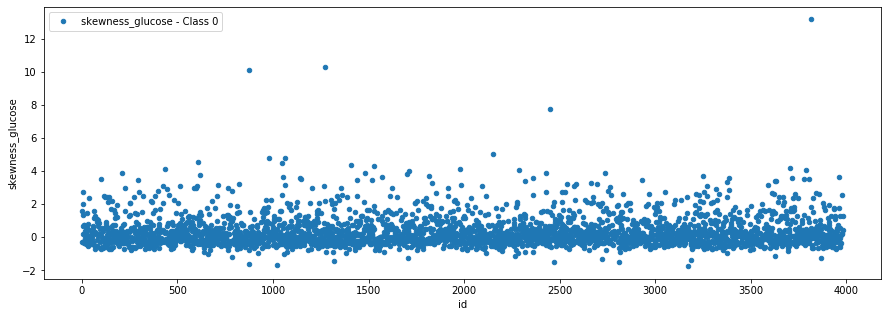

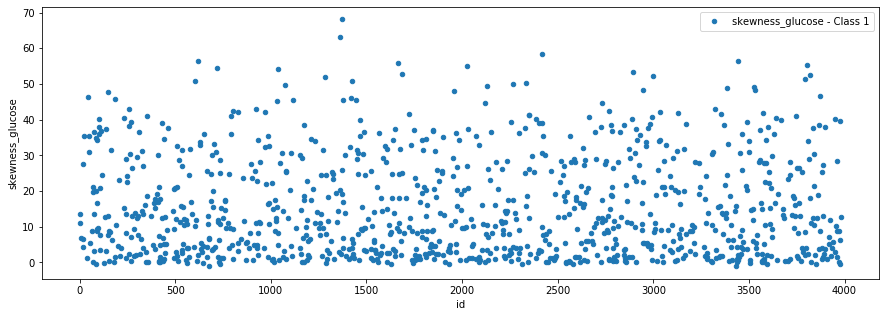

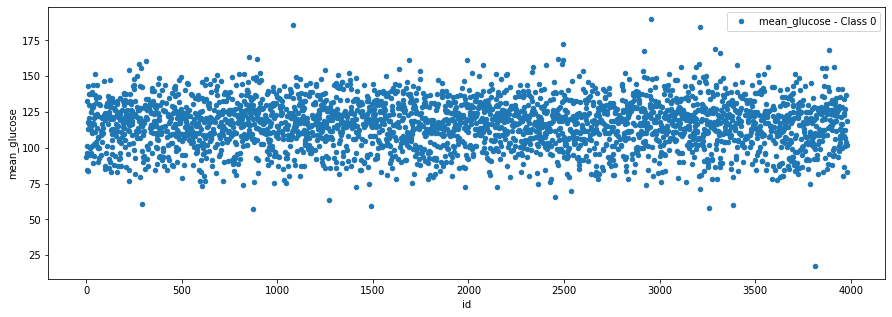

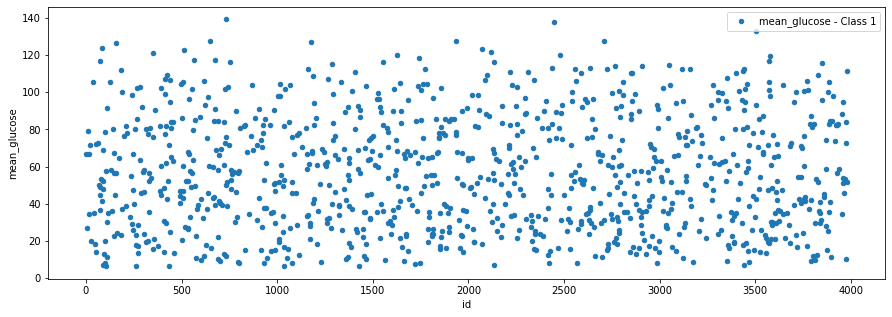

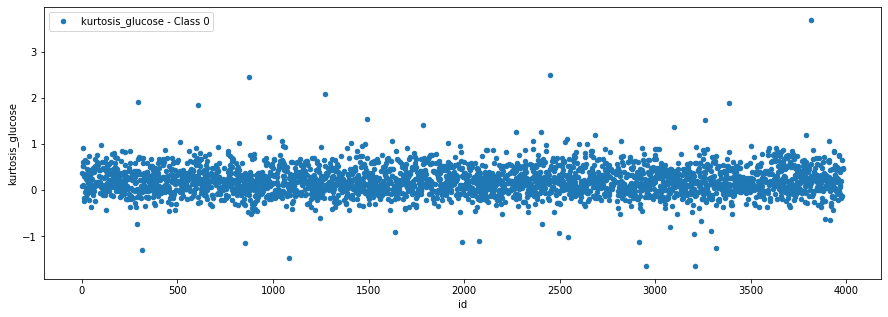

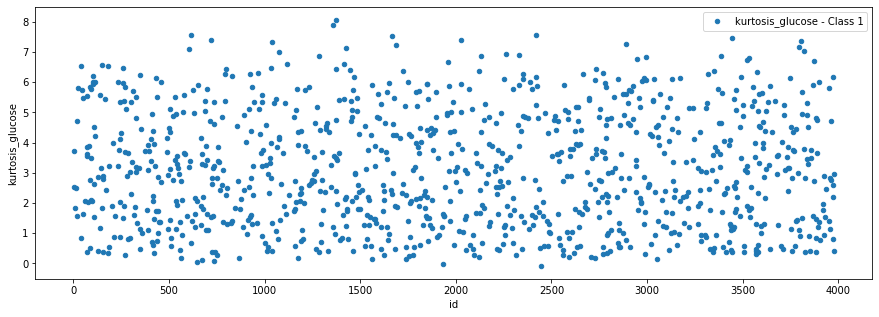

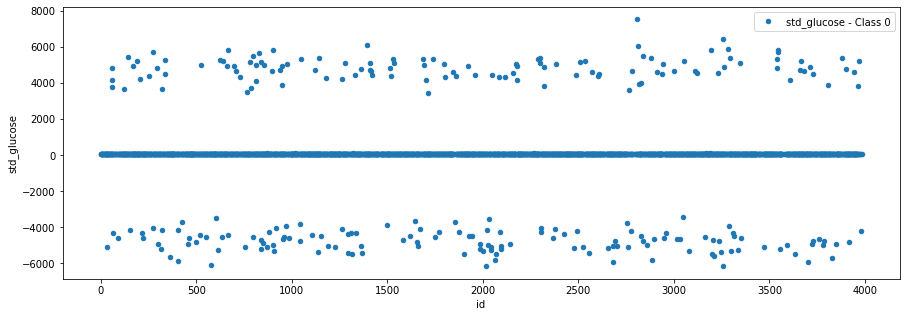

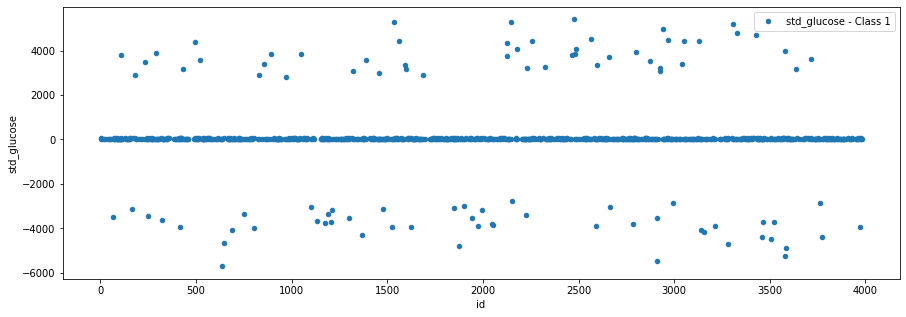

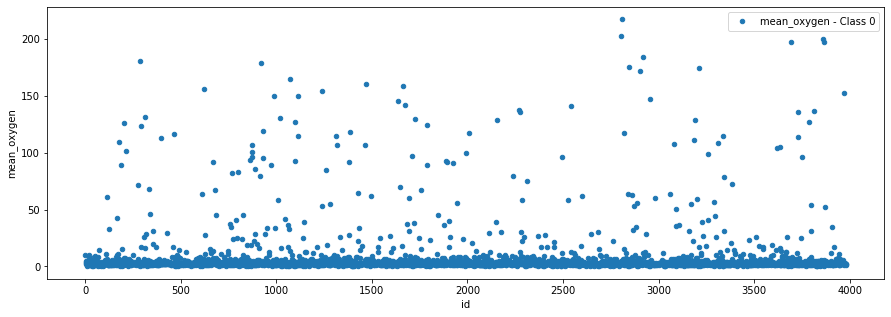

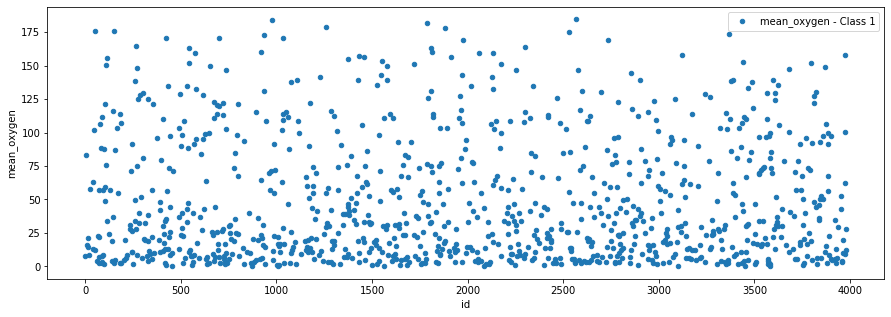

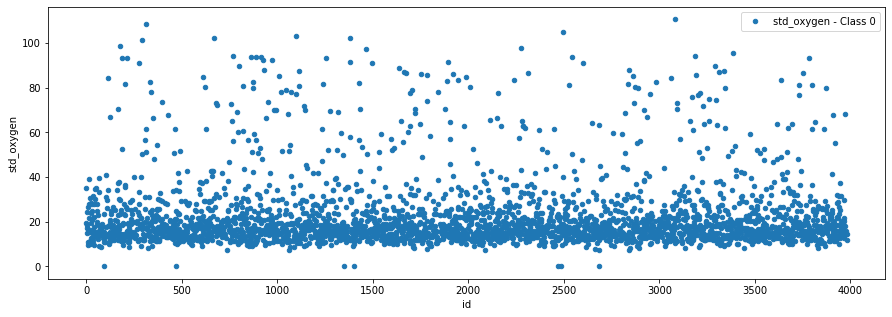

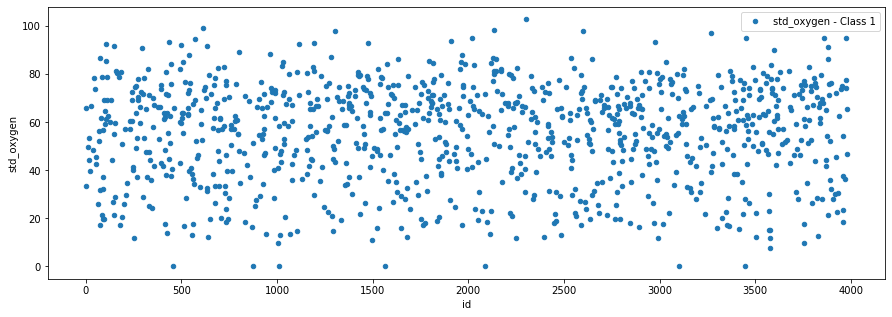

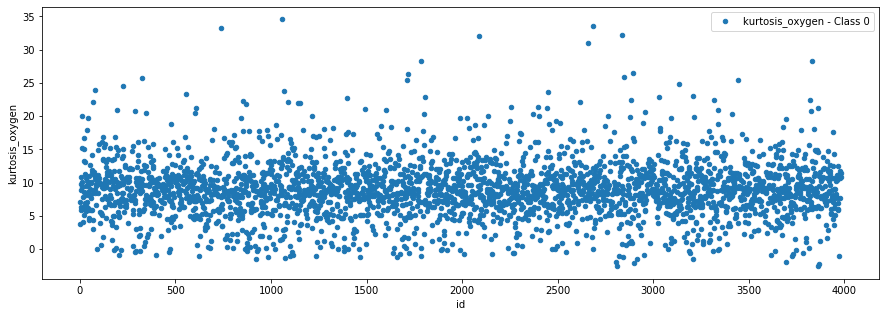

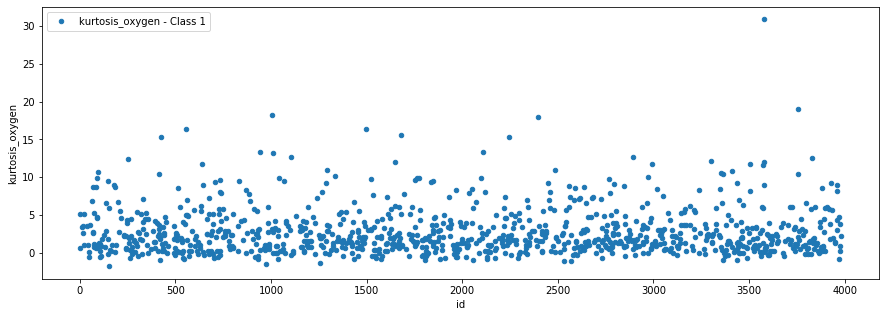

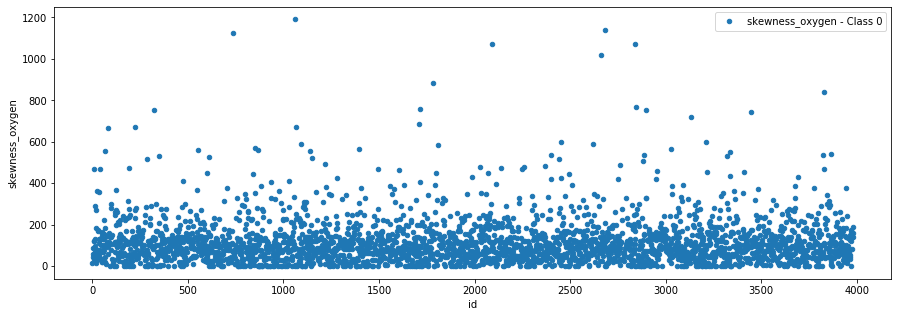

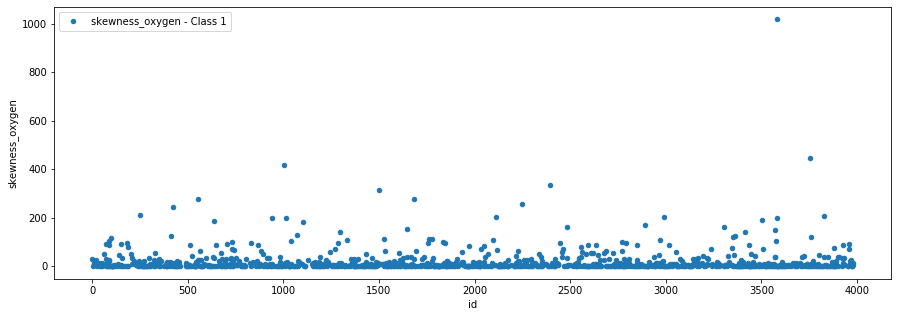

In [19]:
# Draw graphs about glucouse and oxygen values separately for class = 0 and class = 1 for demonstrating the correlations
def draw_graph(l, d, c):
    graph_data = d[[c, "id"]]
    graph_data.plot.scatter(label=l, x="id", y=c, figsize=(15, 5)).plot()


for gl in [
    "skewness_glucose",
    "mean_glucose",
    "kurtosis_glucose",
    "std_glucose",
    "mean_oxygen",
    "std_oxygen",
    "kurtosis_oxygen",
    "skewness_oxygen",
]:
    for cl in range(2):
        d = data2[data2["class"] == cl]
        draw_graph(gl + " - Class " + str(cl), d, gl)

In [20]:
#Check descriptive statistics
data2.describe()

,id,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3983.00000,3969.000000,3970.000000,3970.000000,3974.000000,3972.000000,3.975000e+03,3970.000000,3576.000000,3968.000000,3972.000000,3983.000000,3983.000000,3983.000000,3983.000000
mean,1991.00000,10.105820,4.204384,101.316188,1021.045294,0.949206,1.906805e+05,0.255919,21.480270,40.413810,89.852467,18.358678,30.976841,7.391561,91.140747
std,1149.93739,2.617479,9.650541,33.564251,7104.252371,1.607400,1.072447e+05,0.436432,1454.359059,12.146992,410.365168,34.711617,22.318882,4.831313,108.641380
min,0.00000,1.000000,-1.755332,6.187500,0.000000,-1.641515,1.930200e+04,0.000000,-6180.434729,1.000000,0.000000,0.000000,0.000000,-2.597872,-1.976976
25%,995.50000,9.000000,-0.118819,87.812500,0.000000,0.072000,1.181185e+05,0.000000,39.303373,40.000000,0.000000,2.047659,14.985995,3.605114,12.177219
50%,1991.00000,10.000000,0.373534,110.671875,0.000000,0.311577,1.774260e+05,0.000000,45.878359,40.000000,0.000000,3.209866,20.427191,7.765440,68.178106
75%,2986.50000,13.000000,2.080266,124.177734,0.000000,0.775953,2.372220e+05,1.000000,50.866252,45.000000,0.000000,12.493729,42.828367,10.260328,126.954629
max,3982.00000,16.000000,68.101622,189.734375,99999.000000,8.069522,1.268339e+06,1.000000,7510.763110,99.000000,4356.000000,217.371238,110.642211,34.539844,1191.000837


In [21]:
#Check correlation
data2.corr()

,id,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
id,1.000000,0.023416,0.003732,-0.007887,-0.002408,0.001720,-0.018870,0.003652,-0.001845,0.022535,0.013435,-0.004581,-0.003292,0.002513,0.003397
education-num,0.023416,1.000000,-0.009031,-0.003199,0.123904,-0.002675,-0.061379,0.005555,-0.017807,0.132227,0.078224,0.004069,0.001390,0.006995,0.015867
skewness_glucose,0.003732,-0.009031,1.000000,-0.826373,0.001938,0.962056,-0.009444,0.680059,0.010253,0.006267,-0.005486,0.550525,0.556820,-0.474526,-0.311117
mean_glucose,-0.007887,-0.003199,-0.826373,1.000000,-0.014922,-0.925739,0.021826,-0.774540,-0.027616,0.012678,0.005045,-0.541110,-0.556414,0.469490,0.306954
capital-gain,-0.002408,0.123904,0.001938,-0.014922,1.000000,0.007281,-0.011007,0.044358,0.014430,0.057342,-0.031535,-0.008520,0.002001,0.003613,0.000179
kurtosis_glucose,0.001720,-0.002675,0.962056,-0.925739,0.007281,1.000000,-0.013974,0.787698,0.017879,-0.001052,-0.007551,0.594049,0.616980,-0.525496,-0.346084
fnlwgt,-0.018870,-0.061379,-0.009444,0.021826,-0.011007,-0.013974,1.000000,-0.023824,-0.001051,-0.062134,-0.005328,-0.015537,-0.016870,0.023570,0.026052
class,0.003652,0.005555,0.680059,-0.774540,0.044358,0.787698,-0.023824,1.000000,0.004330,-0.007610,-0.005261,0.514376,0.641619,-0.556507,-0.391951
std_glucose,-0.001845,-0.017807,0.010253,-0.027616,0.014430,0.017879,-0.001051,0.004330,1.000000,0.006073,-0.017251,0.023268,0.008483,-0.009952,-0.016300
hours-per-week,0.022535,0.132227,0.006267,0.012678,0.057342,-0.001052,-0.062134,-0.007610,0.006073,1.000000,0.051385,0.008126,-0.002563,0.000573,-0.001695


[]

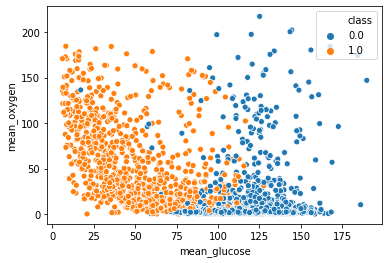

In [22]:
# Plot charts with glucose and oxygen data related to the disease classification for demonstrating the correlation
sea.scatterplot(data2.mean_glucose, data2.mean_oxygen, hue=data2['class']).plot()

[]

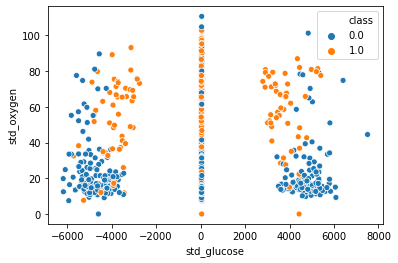

In [23]:
sea.scatterplot(data2.std_glucose, data2.std_oxygen, hue=data2['class']).plot()

[]

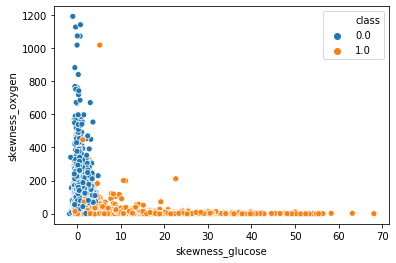

In [24]:
sea.scatterplot(data2.skewness_glucose, data2.skewness_oxygen, hue=data2['class']).plot()

[]

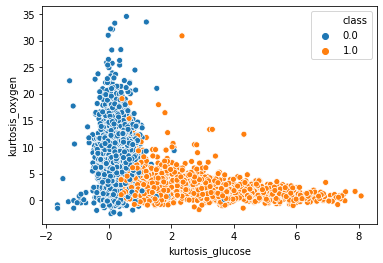

In [25]:
sea.scatterplot(data2.kurtosis_glucose, data2.kurtosis_oxygen, hue=data2['class']).plot()

In [26]:
# Find name duplicates in data
data[data.duplicated(["name"])]

,id,name,address,age,sex,date_of_birth


In [27]:
# Find name duplicates in data2
data2[data2.duplicated(["name"])]

,id,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,income,medical_info,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
219,219,Maurice Riley,"58487 Schneider Street\r\nGriffinfurt, RI 56689",White,Divorced,Machine-op-inspct,f,9.0,NaN,0.220759,...,<=50K,"{'mean_oxygen':'2.526755853','std_oxygen':'14....",United-States,40.0,NaN,Private,2.526756,14.287719,8.427850,100.930020
474,474,Raymundo Marceau,"993 Heather View\r\nCarolynhaven, UT 99182",White,Never-married,Adm-clerical,f,9.0,Own-child,0.912863,...,<=50K,"{'mean_oxygen':'2.034280936','std_oxygen':'15....",United-States,40.0,0.0,Private,2.034281,15.260820,9.965459,116.545664
853,853,Jackson Moorehouse,"621 William Skyway\r\nPort Mark, LA 44554",White,Married-civ-spouse,Adm-clerical,NaN,NaN,Husband,0.251593,...,>50K,"{'mean_oxygen':'2.581103679','std_oxygen':'16....",United-States,NaN,0.0,Private,2.581104,16.575941,8.850971,92.531872
1010,1010,Adam Perry,"02726 Hale Lane\r\nLynchmouth, HI 33466",White,Widowed,Adm-clerical,f,10.0,Unmarried,NaN,...,NaN,NaN,United-States,40.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000
1355,1355,Michael Atchison,"4214 Kim Path\r\nLake Crystalstad, PA 11945",White,Married-civ-spouse,Sales,f,NaN,Husband,0.765886,...,>50K,"{'mean_oxygen':'2.956521739','std_oxygen':'15....",United-States,45.0,1902.0,Private,2.956522,15.094622,7.916995,87.675141
1382,1382,Thomas Porter,"930 Calvin Highway Suite 062\r\nEast Samuel, H...",NaN,Married-civ-spouse,Machine-op-inspct,f,9.0,Husband,NaN,...,NaN,"{'mean_oxygen':'91.55183946','std_oxygen':'102...",NaN,40.0,0.0,Private,91.551839,102.500925,0.330277,-1.784582
1568,1568,Michael Barnum,"9740 Joshua Roads\r\nVazquezmouth, TN 15386",NaN,Married-civ-spouse,Exec-managerial,f,NaN,Husband,0.796410,...,>50K,NaN,NaN,NaN,0.0,Private,0.000000,0.000000,0.000000,0.000000
1588,1588,Raul Vernon,"198 Wright Street Suite 397\r\nWendyshire, TN ...",Black,Never-married,NaN,f,9.0,Not-in-family,NaN,...,<=50K,"{'mean_oxygen':'5.973244147000001','std_oxygen...",NaN,40.0,0.0,Private,5.973244,31.325766,5.831691,34.735606
1957,1957,William Valdez,"51548 John Branch\r\nEast Zacharyberg, AZ 21129",White,Married-civ-spouse,Exec-managerial,f,9.0,Husband,0.284425,...,<=50K,"{'mean_oxygen':'6.505016722000001','std_oxygen...",United-States,40.0,0.0,Self-emp-inc,6.505017,31.948524,5.217048,27.273369
1987,1987,David Amaya,4394 Rebecca Extension Suite 442\r\nNorth Jess...,White,Married-civ-spouse,NaN,f,9.0,Husband,-0.724337,...,<=50K,"{'mean_oxygen':'2.843645485','std_oxygen':'20....",United-States,50.0,0.0,Private,2.843645,20.990955,8.237227,72.264633


In [28]:
# Check the difference between 2 entries having the same name
name = list(data2[data2.duplicated(["name"])]["name"])[0]
data2[data2["name"] == name]

,id,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,income,medical_info,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
92,92,Maurice Riley,"58487 Schneider Street\r\nGriffinfurt, RI 56689",White,Divorced,Machine-op-inspct,f,9.0,Own-child,0.220759,...,<=50K,NaN,NaN,40.0,0.0,NaN,0.000000,0.000000,0.00000,0.00000
219,219,Maurice Riley,"58487 Schneider Street\r\nGriffinfurt, RI 56689",White,Divorced,Machine-op-inspct,f,9.0,NaN,0.220759,...,<=50K,"{'mean_oxygen':'2.526755853','std_oxygen':'14....",United-States,40.0,NaN,Private,2.526756,14.287719,8.42785,100.93002


## Predspracovanie (max. 18b)

Na základe identifikovaných problémov v dátach a návrhu ich riešenia v predchádzajúcej fáze treba zrealizovať predspracovanie. Výsledkom by mala byť upravená dátová sada (vo formáte `csv`) vo vhodnom tvare pre strojové učenie. To znamená, že jedno pozorovanie musí byť opísané jedným riadkom tabuľky; zároveň, keďže v tretej fáze budeme pracovať s algoritmom, ktorého implementácia podporuje len numerické dáta, bude potrebné všetky nenumerické atribúty transformovať na numerické. Napokon, keďže sa predspracovaním mohol zmeniť tvar a charakteristiky dát (počet atribútov, distribúcie hodnôt a pod.), treba znovu zrealizovať podstatné časti prieskumnej analýzy. Významnú časť hodnotenia bude predstavovať znovupoužiteľnosť (replikovateľnosť) predspracovania.

V tejto fáze sa od vás očakáva:
- **Integrácia dát a prípadná deduplikácia záznamov (4b).** Výsledkom by mala byť jednotná tabuľková reprezentácia dát, ktorá bude predstavovať vstup pre ďalšie spracovanie a (v 3. fáze) strojové učenie.
- **Realizácia krokov predspracovania dát a ich zdokumentovanie (5b).** 
  - Pri riešení chýbajúcich hodnôt vyskúšajte rôzne stratégie (očakáva sa vyskúšanie minimálne dvoch stratégií, pričom aspoň jedna z nich musí byť zvolená z posledných troch menovaných):
    - nahradenie chýbajúcej hodnoty mediánom
    - nahradenie chýbajúcej hodnoty priemerom
    - nahradenie chýbajúcej hodnoty pomerom ku korelovanému atribútu
    - nahradenie chýbajúcej hodnoty priemerom segmentu
    - nahradenie chýbajúcej hodnoty pomocou lineárnej regresie
    - nahradenie chýbajúcej hodnoty pomocou algoritmu k-najbližších susedov
  - Podobne postupujte aj pri riešení vychýlených (odľahlých) hodnôt, pričom vyskúšajte aspoň dve  zo stratégií uvedených nižšie:
    - odstránenie vychýlených (odľahlých) pozorovaní
    - nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (5 percentilom, resp. 95 percentilom)
    - transformácia atribútu s vychýlenými hodnotami pomocou zvolenej funkcie (logaritmus, odmocnina a pod.)
- **Znovupoužiteľnosť predspracovania (5b).** Upravte váš kód realizujúci predspracovanie trénovacej množiny tak, aby ho bolo možné bez ďalších úprav znovupoužiť na predspracovanie validačnej, resp. testovacej množiny (ich predspracovanie sa pritom v tej fáze nevyžaduje, odovzdaný kód v `Jupyter Notebooku` na to však musí byť pripravený). Očakáva sa preto, že bude predspracovanie realizované pomocou funkcií alebo využijete možnosti knižnice `sklearn.pipeline`. Častým problémom býva využitie informácií, ktoré nie sú dostupné v čase zbierania údajov (napr. štatistické informácie o celej testovacej sade pri spracovaní trénovacích údajov alebo aj pri spracovaní jednotlivých pozorovaní z testovacej sady), čím môžete do trénovania zaniesť znalosť z validačnej alebo testovacej množiny; vaše riešenie toto musí ošetrovať.
- **Opätovná realizácia podstatných častí prieskumnej analýzy (4b).** V rámci nej by ste mali vedieť zodpovedať na otázku, ako sa zmenili distribúcie hodnôt po realizácii krokov predspracovania (t. j. treba ju realizovať len tam, kde vaším predspracovaním došlo k nejakým zmenám).

Správa sa odovzdáva v 9. týždni semestra na cvičení (dvojica svojmu cvičiacemu odprezentuje vykonané predspracovanie v `Jupyter Notebooku`). Následne správu elektronicky odovzdá jeden člen z  dvojice do systému AIS do **nedele 24.11.2019 do 23:59**.

In [29]:
# Remove time from the date_of_birth
data["date_of_birth"] = data["date_of_birth"].str.split(" ", expand=True)[0]
data.head(30)

,id,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",60.0,Male,1959-09-26
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52.0,Male,1966-10-28
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60.0,Male,1959-06-16
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",39.0,Male,1980-09-09
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",49.0,Male,1970-02-22
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",46.0,Male,1973-09-25
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,54.0,Female,1964-10-31
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,67.0,Male,1952-07-23
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",52.0,Male,1967-06-28
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",30.0,Male,1988-11-07


In [30]:
# Replace '/' characters to '-' characters in date_of_birth
data["date_of_birth"] = data["date_of_birth"].str.replace("/", "-")
data.head(30)

,id,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",60.0,Male,1959-09-26
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52.0,Male,1966-10-28
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60.0,Male,1959-06-16
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",39.0,Male,1980-09-09
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",49.0,Male,1970-02-22
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",46.0,Male,1973-09-25
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,54.0,Female,1964-10-31
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,67.0,Male,1952-07-23
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",52.0,Male,1967-06-28
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",30.0,Male,1988-11-07


In [31]:
# Replace NaN with 0
data = data.fillna(value=0)
data.head(30)

,id,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",60.0,Male,1959-09-26
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52.0,Male,1966-10-28
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60.0,Male,1959-06-16
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",39.0,Male,1980-09-09
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",49.0,Male,1970-02-22
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",46.0,Male,1973-09-25
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,54.0,Female,1964-10-31
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,67.0,Male,1952-07-23
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",52.0,Male,1967-06-28
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",30.0,Male,1988-11-07


In [32]:
# Fix non-numeric age values
def fix_age(age):
    try:
        return int(age)
    except:
        return 0


data["age"] = data["age"].apply(fix_age)

In [33]:
# Check people with age greater than 90,
# to know how to properly convert 2 digit date_of_birth year field values to 4 digit one
data[data["age"] > 90]

,id,name,address,age,sex,date_of_birth
1458,1458,Edward Freas,"3415 Davis Centers\r\nLake Matthew, WA 20714",93,Male,27-03-1926
2195,2195,Richard Alvarez,"92341 Matthew Trail Suite 673\r\nEast Janet, I...",97,Male,1922-09-05
2865,2865,Charles Gillespie,62025 Michael Turnpike\r\nSouth Stephaniemouth...,99,Male,1920-03-03


In [34]:
# Fix the date format in the date_of_birth, make it consistently being yyyy-mm-dd
def fix_date(date):
    s = date.split("-")
    if (
        len(s[0]) == 4
    ):  # Don't need to fix anything if the first field is a 4 digit year number
        return date
    if len(s[2]) == 4:  # Replace dd-mm-yyyy format to yyyy-mm-dd format
        return s[2] + "-" + s[1] + "-" + s[0]
    # Replace yy-mm-dd format to yyyy-mm-dd format
    #
    # If the last 2 digit of the 4 digit year field is bigger than 20,
    # then we expect a date of birth between 1921 and 1999, otherwise between 2000 and 2020,
    # because we have verified earlier that we don't have people older than 90 years old in such date format
    if int(s[0]) > 20:
        return "20" + s[0] + "-" + s[1] + "-" + s[2]
    else:
        return "19" + s[0] + "-" + s[1] + "-" + s[2]
    return date


data["date_of_birth"] = data["date_of_birth"].apply(fix_date)
data.head(30)

,id,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",60,Male,1959-09-26
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52,Male,1966-10-28
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",60,Male,1959-06-16
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",39,Male,1980-09-09
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",49,Male,1970-02-22
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",46,Male,1973-09-25
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,54,Female,1964-10-31
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,67,Male,1952-07-23
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",52,Male,1967-06-28
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",30,Male,1988-11-07


In [35]:
# Approximate the date of the dataset by adding the age of people to their date_of_birth. Choose the highest value.
def add_age(row):
    return str(int(row["date_of_birth"][:4]) + row["age"]) + row["date_of_birth"][4:]


dataset_date = data.apply(add_age, axis=1)
# dataset_date.sort

In [36]:
# Calculate the age of people based on the start of the analysis date (25th of October 2019)